# Sunny Nurseries Iris Plant Stock

"Sunny Nurseries" have had a customer inquiry about their Iris plants that they sell. The customer wishes to know how what is the average size of petals on the three different species that "Sunny Nurseries" sells. The nursery is situated in England.

I have had the task to find out from a sample population to find out the size orders from large to small. 
I will do an analysis of the data provided and present my findings to the customer.

In [321]:
# I will import the dataset and import relevant packages to help with my research
import pandas as pd # To read the data set
import numpy as np # To use for math functions
import matplotlib.pyplot as plt # Used for plotting
import scipy.stats as scs # used for math functions and stats
import seaborn as sns # used for plotting
from scipy.stats import norm,t # used for normal distribution and t function

from statsmodels.formula.api import ols # used for regression (least squares)

df_iris = pd.read_csv('..\StatistiskaMetoder\data\iris.csv') # importing the dataset

In [322]:
# Showing the top 3 lines of the dataframe
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [323]:
# Here is what information is provided in the data set
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal_length   150 non-null    float64
 1    sepal_width   150 non-null    float64
 2    petal_length  150 non-null    float64
 3    petal_width   150 non-null    float64
 4    class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [324]:
# This shows the unique elements of the column class
df_iris[' class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We can see here that there is 5 different columns containing information of the type(class), sepal length, sepal width, petal length and petal width. There are 150 rows of data.

I can see that the nursery has 3 varieties of Iris Species. 

I will now divide the data set into the relevant 3 species and calculate an extra column that will give the area of each petal.

This will enable me to do further research into the different sizes of petals for the customer.

In [325]:
# I will multiply the petal length by the petal width to get an area of the petal.

df_iris = df_iris.rename(columns={' petal_length': 'petal_length', ' petal_width': 'petal_width'}) # Fixing  empty space before column names

df_iris["petal_area"] = df_iris["petal_length"] * df_iris["petal_width"] # multiplying the two columns and creating a new column
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class,petal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,0.28


In [326]:
# Now I will separate so that the 3 types have a separate table each.

df_setosa = df_iris[df_iris[' class'] == 'Iris-setosa'].reset_index(drop=True)
df_versicolor = df_iris[df_iris[' class'] == 'Iris-versicolor'].reset_index(drop=True)
df_virginica = df_iris[df_iris[' class'] == 'Iris-virginica'].reset_index(drop=True)

# we can tell that each data set has a total of 50 of the 3 different types of Iris flowers
# This is good as it is equal sample sets for each type


In [327]:
# Here is an example of what the virginica datadramwe looks like
df_virginica.head(3)


,sepal_length,sepal_width,petal_length,petal_width,class,petal_area
0,6.3,3.3,6.0,2.5,Iris-virginica,15.00
1,5.8,2.7,5.1,1.9,Iris-virginica,9.69
2,7.1,3.0,5.9,2.1,Iris-virginica,12.39


Now that I have arranged the data to 3 different samples with the respected species of Iris. The next step is to see what is the averages of the area of petal so the customer can get an idea of what sizes the petals can be. 

In [328]:
# getting the mean and median of the length of stem(sepal) for each Iris type
setosa_petal_area_mean = df_setosa["petal_area"].mean().round(2) # This is the mean average
setosa_petal_area_median = df_setosa["petal_area"].median().round(2) # This is the median average
setosa_petal_area_stan_dev = np.std(df_setosa["petal_area"],ddof=1).round(2) # This is the standard deviation
print(f"The Setosa Iris petal area has a mean of {setosa_petal_area_mean}, median of {setosa_petal_area_median} and a Standard deviation of {setosa_petal_area_stan_dev}")
# I then print out the results and will repeat for the other varieties.

versicolor_petal_area_mean = df_versicolor["petal_area"].mean().round(2)
versicolor_petal_area_median = df_versicolor["petal_area"].median().round(2)
versicolor_petal_area_stan_dev = np.std(df_versicolor["petal_area"],ddof=1).round(2) # ddof means that it is a sample standard deviation
print(f"The Versicolor Iris petal area has a mean of {versicolor_petal_area_mean}, median of {versicolor_petal_area_median} and Standard deviation of {versicolor_petal_area_stan_dev}")

virginica_petal_area_mean = df_virginica["petal_area"].mean().round(2)
virginica_petal_area_median = df_virginica["petal_area"].median().round(2)
virginica_petal_area_stan_dev = np.std(df_virginica["petal_area"],ddof=1).round(2)
print(f"The Virginica Iris petal area has a mean {virginica_petal_area_mean}, median {virginica_petal_area_median} and a Standard deviation of {virginica_petal_area_stan_dev}")


The Setosa Iris petal area has a mean of 0.36, median of 0.3 and a Standard deviation of 0.18
The Versicolor Iris petal area has a mean of 5.72, median of 5.62 and Standard deviation of 1.37
The Virginica Iris petal area has a mean 11.3, median 11.44 and a Standard deviation of 2.16


Based from this information I can see that the Virginica species on average has the largest petals and the Setosa species on average has the smallest petals. 
The standard deviation on the Setosa is very low meaning that the data is closer to the mean average. The other two are slightly further from the mean average, but not by an outstanding value.
I also wish to visualize the different averages and want to see how accurate the mean is compared to the normal distribution of each sample set. I also want to see how the data is spread, so I can see how the mode average compares to the other average types.   

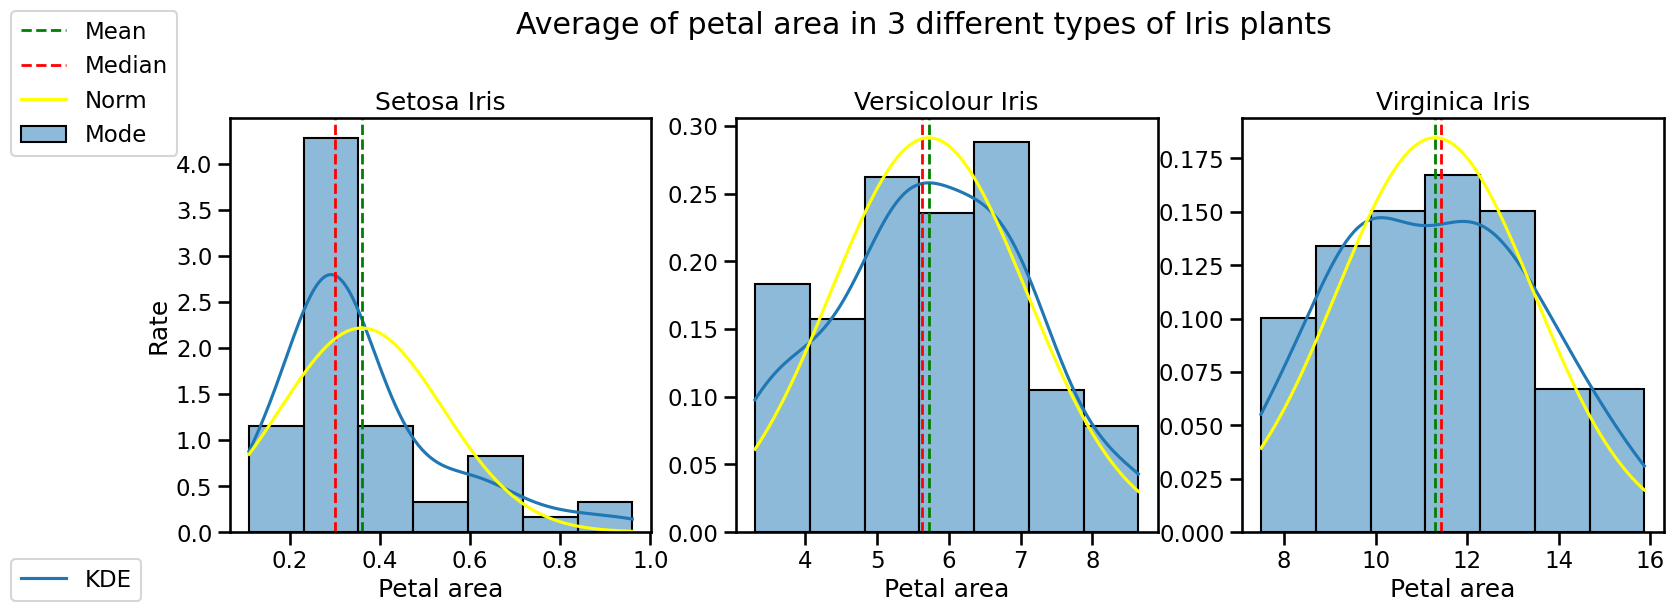

In [329]:
# plot on 3 different graphs median and mean of the petal area of each different varieties of Iris

fig, ax = plt.subplots(1,3, figsize= (18.5,6)) # Setting the dimensions and amount of graphs to be displayed
bins = 7 # variable to  adjust the amount of bins so that each graph has an equal amount.

# setosa plot
sns.histplot(ax = ax[0], x = "petal_area", data=df_setosa, stat="density", kde=True,bins=bins, label="Mode")
# Added data set and what data for x and y, kde line and labels and which axes it will be on 
sns.set_context("talk") # choosing the style of the graphs. Ensures the graphs are easy to read.
fig.subplots_adjust(top=.8) # adjusting where the title is.
fig.suptitle('Average of petal area in 3 different types of Iris plants') # Title of the group of charts
fig.legend(labels=["KDE"],loc="lower left") # adding a legend for the kde line

ax[0].set(title="Setosa Iris", xlabel= "Petal area", ylabel= "Rate") # Adding title and label for x and y axes
ax[0].axvline(setosa_petal_area_mean, color="green", linestyle="--", linewidth=2, label="Mean") # adding the mean line
ax[0].axvline(setosa_petal_area_median, color="red", linestyle="--", linewidth=2, label="Median") # adding the median line

setosa_x = np.linspace(0.11, 0.96, 1000) # This takes the lowest value and highest and so the normal distribution can be plotted on the graph between two linespaces
setosa_y = norm.pdf(x= setosa_x , loc=setosa_petal_area_mean, scale=setosa_petal_area_stan_dev) #workings for the normal distribution
ax[0].plot(setosa_x,setosa_y, color="yellow", label="Norm") #Plotting the normal distribution line

# versicolor plot, The code follows the same here as of the Setosa, but being placed on the next axes.
sns.histplot(ax = ax[1], x= "petal_area", data=df_versicolor,stat="density", kde=True, bins=bins)
ax[1].set(title="Versicolour Iris", xlabel="Petal area", ylabel=None)
ax[1].axvline(versicolor_petal_area_mean, color="green", linestyle="--", linewidth=2)
ax[1].axvline(versicolor_petal_area_median, color="red", linestyle="--", linewidth=2)

versicolor_x = np.linspace(3.3, 8.64, 1000)
versicolor_y = norm.pdf(x= versicolor_x , loc=versicolor_petal_area_mean, scale=versicolor_petal_area_stan_dev)
ax[1].plot(versicolor_x,versicolor_y, color="yellow")

# virginica plot, Follows the same but on another axes
sns.histplot(ax = ax[2], x= "petal_area", data=df_virginica, stat="density",kde=True, bins=bins)
ax[2].set(title="Virginica Iris", xlabel="Petal area", ylabel=None)
ax[2].axvline(virginica_petal_area_mean, color="green", linestyle="--", linewidth=2)
ax[2].axvline(virginica_petal_area_median, color="red", linestyle="--", linewidth=2)

virginica_x = np.linspace(7.5, 15.87, 1000)
virginica_y = norm.pdf(x= virginica_x , loc=virginica_petal_area_mean, scale=virginica_petal_area_stan_dev)
ax[2].plot(virginica_x,virginica_y, color="yellow")


fig.legend(loc="upper left") # This enables the legend to be on the top left with all the different averages.

plt.show() # plots the graphs

This has given some very interesting results. It shows that the Setosa Iris mode average is very focused on one area size. The other two Iris plants have very spread out mode average results. I can therefore inform the customer that the Setosa plants petals are more likely to be closer to the mean average. This may be useful as they may want all the petals to be of similar size.

The Versicolor variety seem to have a very spread rate of mode. However the other averages were not as close to the mode average. This may show that the plant may not be very constant in its size of petals. 

The Virginica plant mode average seems equally distributed and the most occurring sizes are where the mean, median and normal distribution occurs. This shows that it is more occurrent at the mean. However due to to the higher rates of mode, it shows that it can vary. This is also confirmed with the standard deviation results that I got.

All the normal distributions seem to peek at the median average which mean that it complies with its prediction

I presented these results to the customer. However they would like to know how certain I am of these results as the information came from a sample. They wish to know if these results would be representative of the whole population of the nursery, or even if they could be represented for Iris plants that are grown within the country.

I will check the confidence of my results so that I can show the customer the margin of error. It is good to let them know this as we have only measured a point of estimate with the averages from the sample population.

In [330]:
# With this information of the different averages I will now check how certain I am that the normal distribution can be a good
# estimate for the whole population of the petal area of the different species of Iris plants

# Setosa confidence interval of 95%

alpha = 0.05 # This is the significance grade I want to study

setosa_data_total = len(df_setosa["petal_area"]) # length of data set
setosa_petal_area_sem = scs.sem(df_setosa["petal_area"]) # Counts standard error mean  

lower_setosa_petal_area, upper_setosa_petal_area = t.interval(confidence=1-alpha, df=setosa_data_total-1, loc=setosa_petal_area_mean, scale=setosa_petal_area_sem)
# This counts the lower and higher balue from the mean average. It uses the t interval.
print(f"Confidence interval (\u03B1=0.05) for average petal area of \"Setosa\" Iris: {round(lower_setosa_petal_area,1)} - {round(upper_setosa_petal_area,1)} with a mean average of : {setosa_petal_area_mean}")
# This prints out my result

# Versicolor confidence interval of 95%

versicolor_data_total = len(df_versicolor["petal_area"]) # length of data set
versicolor_petal_area_sem = scs.sem(df_versicolor["petal_area"]) # Counts standard error mean  

lower_versicolor_petal_area, upper_versicolor_petal_area = t.interval(confidence=1-alpha, df=versicolor_data_total-1, loc=versicolor_petal_area_mean, scale=versicolor_petal_area_sem)

print(f"Confidence interval (\u03B1=0.05) for average petal area of \"Versicolor\" Iris: {round(lower_versicolor_petal_area,1)} - {round(upper_versicolor_petal_area,1)} with a mean average of : {versicolor_petal_area_mean}")

# Virginica confidence interval of 95 %

virginica_data_total = len(df_virginica["petal_area"]) # length of data set
virginica_petal_area_sem = scs.sem(df_virginica["petal_area"]) # Counts standard error mean  

lower_virginica_petal_area, upper_virginica_petal_area = t.interval(confidence=1-alpha, df=virginica_data_total-1, loc=virginica_petal_area_mean, scale=virginica_petal_area_sem)

print(f"Confidence interval (\u03B1=0.05) for average petal area of \"Virginica\" Iris: {round(lower_virginica_petal_area,1)} - {round(upper_virginica_petal_area,1)} with a mean average of : {virginica_petal_area_mean}") 

Confidence interval (α=0.05) for average petal area of "Setosa" Iris: 0.3 - 0.4 with a mean average of : 0.36
Confidence interval (α=0.05) for average petal area of "Versicolor" Iris: 5.3 - 6.1 with a mean average of : 5.72
Confidence interval (α=0.05) for average petal area of "Virginica" Iris: 10.7 - 11.9 with a mean average of : 11.3


After looking at the results of each confidence interval at a rate of 95 % I can assure the customer that we can be fairly certain that the sample is relatively accurate with the calculation of the mean averages.

The Setosa Iris had the best result with only a very small confidence interval. 
The other two Iris plants had a bit larger confidence intervals. However they were not over a whole unit, which is good.

## Finding a Linear Regression

The customer was very happy with the results that I gave them. However they would like to know more about the form of the petals. They know that The Virginica has the largest petals and the Setosa has the smallest, but how are they formed and how does the length compare to the width of the petal?
Will the petals be wider the longer they are for example?

I will investigate this by using linear regression techniques.  


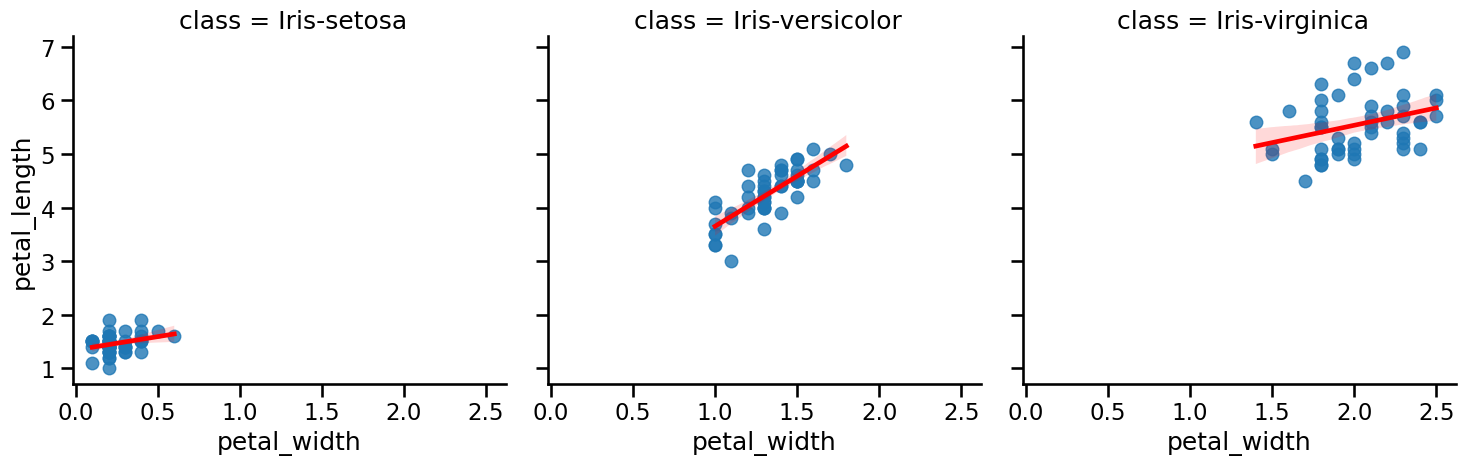

In [331]:
# plotting all the Varieties side by side.
sns.lmplot(data=df_iris, x="petal_width", y="petal_length", col=" class", line_kws={'color': 'red'},col_wrap=3)

Here you can clearly see that each variety has different sizes of petal leaves due to the scale on the graph. It also shows that the Iris petals are small in length and thin in width. While the other two are slightly longer and wider. But overall the anatomy of the Iris plants petals seem to be longer and thin. I will analyze the varieties individually to further my findings.

### Setosa Iris

In [332]:
# Producing an ols regression report of petal length and width of the Setosa
model = ols('petal_length ~ petal_width', data=df_setosa).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     4.970
Date:                Mon, 06 Feb 2023   Prob (F-statistic):             0.0305
Time:                        16:56:06   Log-Likelihood:                 19.597
No. Observations:                  50   AIC:                            -35.19
Df Residuals:                      48   BIC:                            -31.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.3430      0.059     22.698      

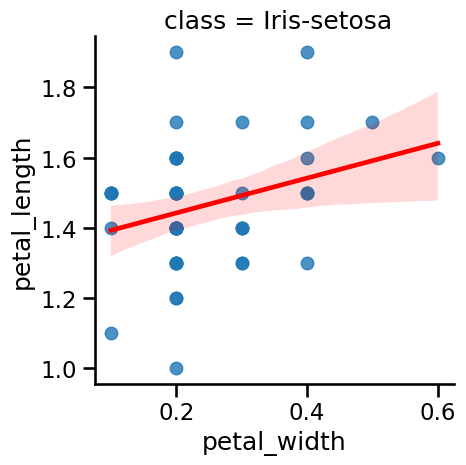

In [333]:
sns.lmplot(data=df_setosa, x="petal_width", y="petal_length",line_kws={'color': 'red'},col=" class")

plt.show()

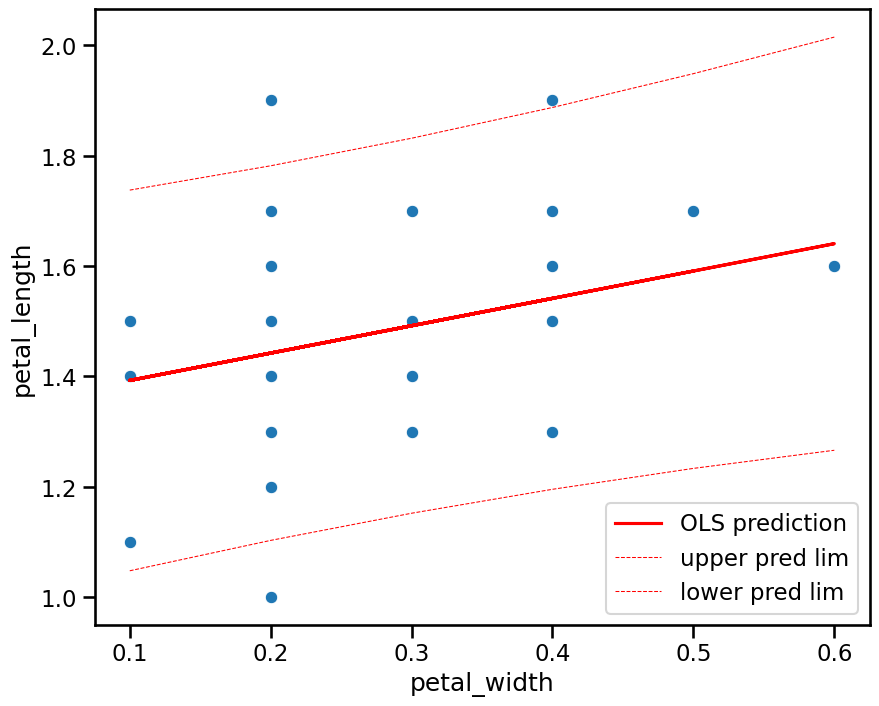

In [334]:
predictions = model.get_prediction(df_setosa['petal_width'])

frame=predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

order = np.argsort(df_setosa['petal_width'])
xs = np.array(df_setosa['petal_width'])[order]
ys = np.array(frame['obs_ci_lower'])[order]

fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(data=df_setosa, x='petal_width', y='petal_length')
ax.plot(df_setosa['petal_width'], ypred, "r", label="OLS prediction")

order = np.argsort(df_setosa['petal_width'])
x = np.array(df_setosa['petal_width'])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)
ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)


ax.legend(loc="lower right")
plt.show()

Here we have a closer view of how the data is spread out in the setosa Iris.

We can tell from the graph that the plot points are rather spread from the linear regression. This is further proved by the R square result in the regression test. This value is at 0.094, which means that the linear regression is not very reliable. If it were closer to the value of 1 then it would be more reliable.
I will have to inform the customer that. If i was able to have more data in my sample then maybe I could of had a more reliable result.

The intercept shows us that the linear regression begins from 1.340. This is not unusual as the data being analyzed is a plant and that would not be possible if the regression began at 0. 

The shaded area of the graph shows the confidence interval. This does not seem very close to the line thus adding to more uncertainty in the linear regression line. 

So I can conclude to the customer that it seems that the Setosa does have a positive linear regression. Thus meaning that the longer the petal are the wider they will be. The petals still are rather thin in comparison to the length. But due to the poor R square result, I can not guarantee that this is always the case. 

### Versicolor Iris

In [335]:
# Producing an ols regression report of petal length and width of the Setosa
model = ols('petal_length ~ petal_width', data=df_versicolor).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     77.93
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           1.27e-11
Time:                        16:56:07   Log-Likelihood:                -8.5674
No. Observations:                  50   AIC:                             21.13
Df Residuals:                      48   BIC:                             24.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7813      0.284      6.276      

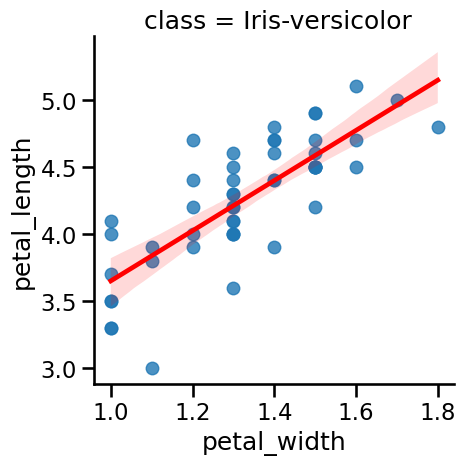

In [336]:
sns.lmplot(data=df_versicolor, x="petal_width", y="petal_length",line_kws={'color': 'red'},col=" class")

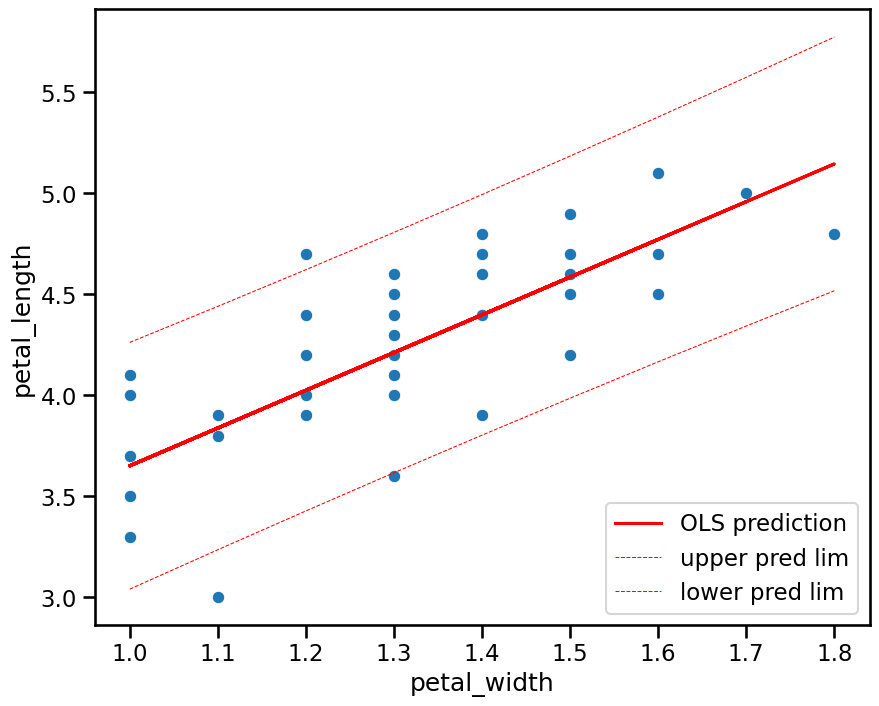

In [337]:
predictions = model.get_prediction(df_versicolor['petal_width'])

frame=predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

order = np.argsort(df_versicolor['petal_width'])
xs = np.array(df_versicolor['petal_width'])[order]
ys = np.array(frame['obs_ci_lower'])[order]

fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(data=df_versicolor, x='petal_width', y='petal_length')
ax.plot(df_versicolor['petal_width'], ypred, "r", label="OLS prediction")

order = np.argsort(df_versicolor['petal_width'])
x = np.array(df_versicolor['petal_width'])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)
ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)


ax.legend(loc="lower right")
plt.show()

With the Versicolor we can directly see with the scale that the petals are bigger than those of the Setosa Iris. I can see that generally that when the petal is longer it will also be wider. 
The plot points do not seem as spread as the Virginica and hold themselves closer to the linear regression line. We can also confirm this more with a R square rating of 0.619. This is much closer to the value of 1. Thus meaning that we say that this linear regression test is much more reliable.
It however has positive linear regression and the shaded area of the confidence interval in the graph seems to much closer to the linear regression line.
Again the intercept begins not at 0 but at 1.783. This is again because the plant is already at growth state. 

I can tell the customer with some confidence about the shape of the leaves and that this linear regression test can be quite reliable. 

### Virginica Iris

In [338]:
model = ols('petal_length ~ petal_width', data=df_virginica).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     5.557
Date:                Mon, 06 Feb 2023   Prob (F-statistic):             0.0225
Time:                        16:56:08   Log-Likelihood:                -37.983
No. Observations:                  50   AIC:                             79.97
Df Residuals:                      48   BIC:                             83.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.2407      0.561      7.555      

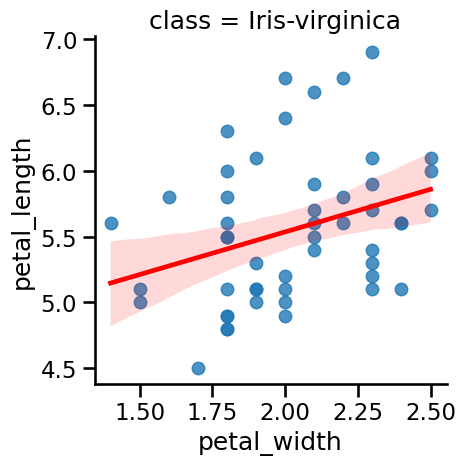

In [339]:
sns.lmplot(data=df_virginica, x="petal_width", y="petal_length",line_kws={'color': 'red'},col=" class")

The Iris virginica has very spread data points

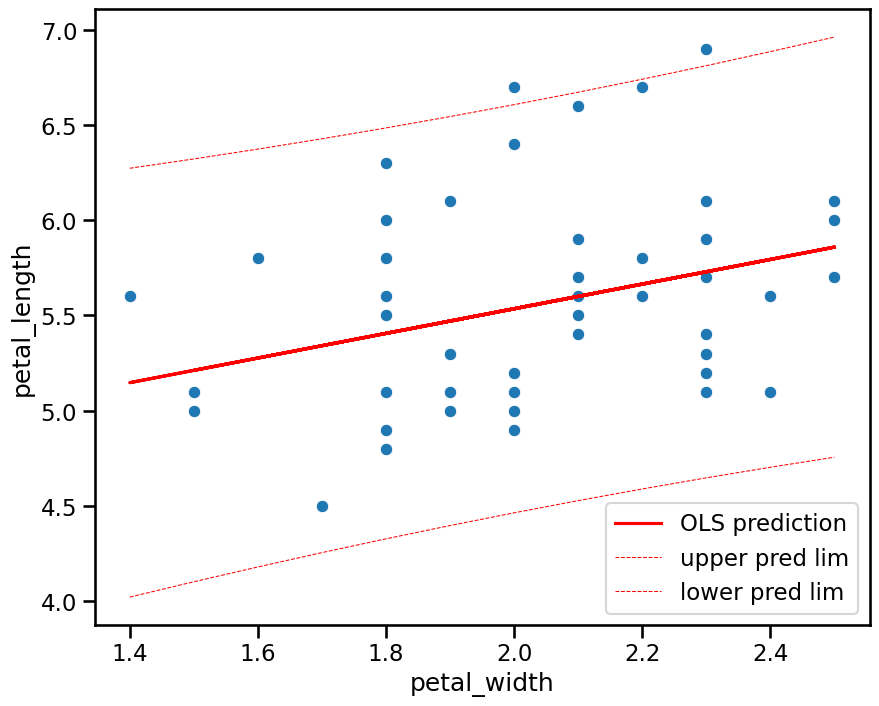

In [340]:
predictions = model.get_prediction(df_virginica['petal_width'])

frame=predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

order = np.argsort(df_virginica['petal_width'])
xs = np.array(df_virginica['petal_width'])[order]
ys = np.array(frame['obs_ci_lower'])[order]

fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(data=df_virginica, x='petal_width', y='petal_length')
ax.plot(df_virginica['petal_width'], ypred, "r", label="OLS prediction")

order = np.argsort(df_virginica['petal_width'])
x = np.array(df_virginica['petal_width'])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)
ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)


ax.legend(loc="lower right")
plt.show()

When looking at the results of the Virginica Iris closer we can now clearly see that the data petal lengths and widths have the potential to be the biggest out of the three different varieties.
The data points are however very spread out from each other. We can not only see this closer isn the graph but also if we look at the OLS regression results. The R squared result is 0.104. This tells me that the linear regression line is not reliable at all as it is very close to the result of 0. I will have to inform the customer of this.
You can also see that the shaded concividence interval areas are of a resonable ditance from the linear regression line. This means that there is a chance that that the results can be very different. 
The intercept tells us that the length and beginning of the linear regression line may begin from 4.2407.  This is again because the starting point will never be 0 as we would not have something to measure from.


### Reporting to the customer

I have now reported my findings to the customer on comparing the length and widths of the Iris petals. They were very appreciative of the work I have put in to find the results. They however were disappointed that the results from the setosa and versicolor were not as accurate as hoped. I assured them that if I had access to a bigger sample size then maybe the results would have been different. 
I also explained to them that the sample set was relevant to what was available at our nursery. There could also be very different results if the sample had been take from another nursery in another area in the country or even another country. I continued to explain to them that is impossible to have the exact population of all these particular Iris varieties to be able to analysis and that even if i did different factors can change things in the results of the measurements. For example what time of year the they were measured and if the plants were all planted at the same time.
This shows that other real life factors also have to be considered when analyzing data from plants and living things.  